# BI - Lab 3 Task1: Descriptive Analysis<br>Unsupervised Learning – IKEA
#### Abu Abdullah Dhrubo<br>*h21abudh@du.se*



Our task is to discover some new places here in Sweden that may be suitable for IKEA department stores. The general steps are data exploration, data transformation, data reduction, and the kmeans clustering method.

## Solution

Setting up the current working directory

In [1]:
import os
import re
os.getcwd()
os.chdir('C:\\Users\\abdul\\Documents\\Högskolan Dalarna\\1st Semester\\3. AMI23B Business Intelligence\\Lab\\3\\Lab3')
print("Directory updated")

Directory updated


Importing the packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
print("importing packages - Successful")

importing packages - Successful


Importing the ikea dataset for our analysis

In [3]:
# Read Text Files with Pandas using read_csv()
  
# read text file into pandas DataFrame
df = pd.read_csv("ikea_kommun_data.txt", sep="\t", encoding='ISO8859')
df = pd.DataFrame(df)

# display DataFrame
df.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [4]:
df.keys() # checking the features of the dataset

Index(['Kommun_code', 'Year', 'Kommun_name', 'Revenue', 'Employee',
       'Population', 'Population_University', 'Percent_University',
       'Productivity', 'SalesIndex', 'Infrast', 'Border'],
      dtype='object')

In [5]:
df.head(10)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
5,117,2010,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0
6,120,2010,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0
8,125,2010,Ekerö,144,116,25410,3893,0.153207,62.21259,14.837580,0,0
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0


Dropping unnececary columns as they are not relavant for the analysis

In [6]:
#Dropping Kommun_code Column
df.drop('Kommun_code', axis = 1, inplace=True)
#Dropping Year Column
df.drop('Year', axis = 1, inplace=True)
df.drop('Infrast', axis = 1, inplace=True)
df.drop('Border', axis = 1, inplace=True)
print("Dropped Kommun_code, Year, Border, Infrast")

Dropped Kommun_code, Year, Border, Infrast


In [7]:
#Putting Kommun Name as rowname(index)
df = df.set_index('Kommun_name')
df.head()

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex
Kommun_name,,,,,,,
Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774
Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869
Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708
Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935
Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627


In [8]:
#Seting the index to 'None' via its name property
df.index.names = [None]
df

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex
Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774
Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869
Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708
Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935
Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627
...,...,...,...,...,...,...,...
Hällefors,52,33,7220,368,0.050970,78.97019,5.358015
Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976
Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346
Kumla,152,98,20456,1598,0.078119,77.73047,15.661890


In [9]:
df.info() # from here we can tell there are no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Haparanda to Askersund
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Revenue                207 non-null    int64  
 1   Employee               207 non-null    int64  
 2   Population             207 non-null    int64  
 3   Population_University  207 non-null    int64  
 4   Percent_University     207 non-null    float64
 5   Productivity           207 non-null    float64
 6   SalesIndex             207 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 12.9+ KB


### Exploring the dataset

In [10]:
df.describe()

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583
std,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055
min,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426
25%,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334263
50%,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765
75%,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058489
max,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819


Text(0.5, 1.0, 'Correlation between different features')

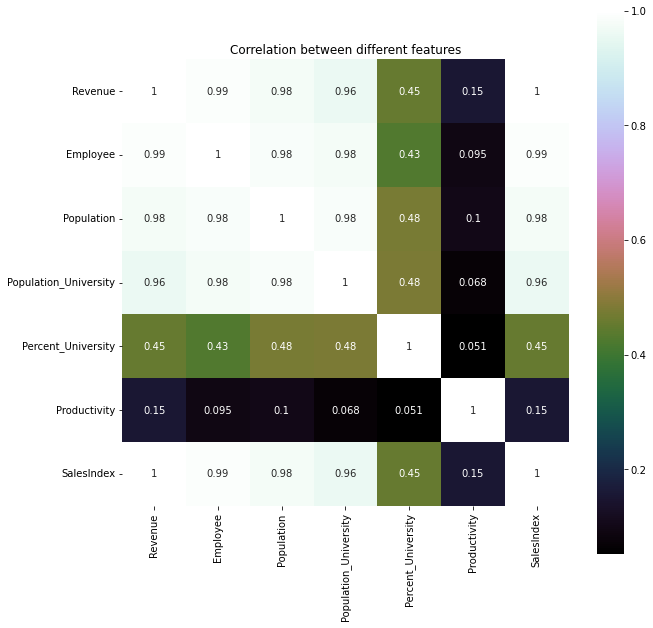

In [11]:
#Visualising correlation using Seaborn library
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

### Data Preprocessing

#### Standard Scaler to standardize

In [12]:
#Scaling the data
#scaled_df = preprocessing.scale(df.T)

scaled_data = StandardScaler().fit_transform(df)
#scaled_data = pd.DataFrame(scaled_df)

scaled_data

array([[ 0.0171844 , -0.16924445, -0.36696823, ..., -0.63900455,
         3.73881675,  0.0171844 ],
       [ 1.02597326,  0.75220563,  0.42373029, ...,  1.01559689,
         0.92207436,  1.02597326],
       [ 1.31239193,  0.9501975 ,  0.76752138, ...,  1.41974542,
         1.01078006,  1.31239193],
       ...,
       [ 1.93284171,  1.6935234 ,  1.51252197, ...,  1.14631992,
         0.45745365,  1.93284171],
       [-0.32726194, -0.291191  , -0.21113965, ..., -0.47568966,
        -0.49200198, -0.32726194],
       [-0.33693322, -0.31379907, -0.34869805, ..., -0.63275046,
         0.20411204, -0.33693322]])

### Dimensionality Reduction with PCA

In [13]:
# Importing PCA
from sklearn.decomposition import PCA
  
pca = PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(207, 7)

### we need to decide how many features we’d like to keep based on the cumulative variance plot

In [14]:
pca.explained_variance_ratio_

array([7.41009137e-01, 1.41464113e-01, 1.07175378e-01, 7.71455805e-03,
       2.00679285e-03, 6.30021530e-04, 7.15665238e-20])

Text(0, 0.5, 'Percentage of Explained Variance')

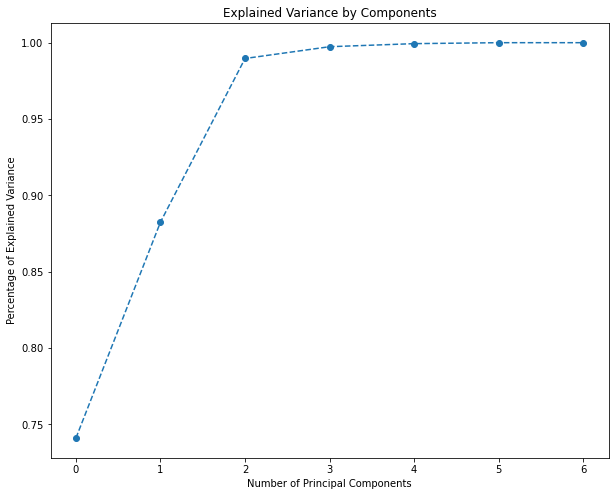

In [15]:
# giving a larger plot
plt.figure(figsize =(10, 8))
  
plt.plot(range(0,7),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
  
# labeling title,x and y axis
plt.title('Explained Variance by Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Percentage of Explained Variance')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 3 components.

In [16]:
# Let's say, components = 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
pca.transform(scaled_data)

array([[-2.56826775e-01,  3.79537568e+00, -3.54488101e-01],
       [ 1.82213768e+00,  8.26915348e-01,  6.26856121e-01],
       [ 2.54541861e+00,  8.57841419e-01,  8.74368773e-01],
       [ 2.86170173e-01,  1.61893608e-01,  3.14778629e-01],
       [-2.91902426e-01, -2.15088137e-01,  8.34729967e-01],
       [-2.59450475e-03, -1.07521272e-01,  7.47846689e-01],
       [ 1.42858290e-01,  3.18142269e-01,  6.43093997e-01],
       [ 2.40425439e+00,  1.22935677e+00,  4.26397148e-01],
       [-2.28847440e-01, -1.12061304e+00,  1.40541905e+00],
       [ 3.51190299e+00,  2.03175427e+00,  8.61506323e-02],
       [ 6.60099835e-01,  1.65446718e+00, -3.73093543e-02],
       [-6.73815182e-01, -2.56745114e+00,  6.58512520e-01],
       [ 5.27854499e-01, -7.57741620e-01, -4.17576513e-01],
       [-5.41994705e-02, -3.48881744e-01,  6.13886739e-01],
       [-3.70182670e-01,  1.69948195e+00,  4.39306328e-01],
       [-8.80219485e-01, -1.79555952e+00,  4.89974832e-02],
       [ 2.24372587e+00,  4.88821890e-01

In [17]:
scores_pca = pca.transform(scaled_data) # transforming the scaled data
print("Transformation successful")

Transformation successful


### Kmeans Clustering with PCA

First, however, we must decide how many clustering solutions we’d test.
There is no general ruling on this issue. It really depends on the data. In our case, we test an algorithm with up to 10 clusters.

In [18]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,13):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


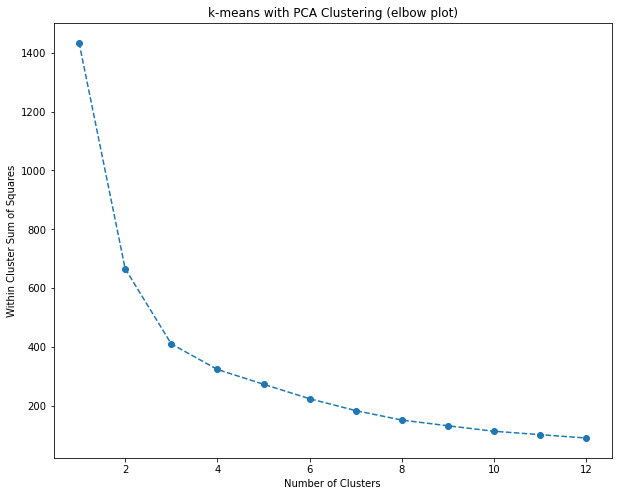

In [19]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 13), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')

plt.title('k-means with PCA Clustering (elbow plot)')
plt.show()

In [20]:
# We have chosen three clusters, so we run k-means with number of clusters equals three.
# Same initializer and random state as before.

kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

# We Fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

### Analyzing the Results of PCA and K-Means Clustering

In [21]:
#K-means clustering with PCA Results

# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_2 = pd.concat([df.reset_index(drop = False), pd.DataFrame(scores_pca)], axis = 1)
# df_segm_pca_kmeans = pd.concat([pd.DataFrame(scores_pca)], axis = 1)
df_2.columns.values[-3: ] = ['Comp_1', 'Comp_2', 'Comp_3']

# The Last column we add contains the pca k-means clustering Labels.
df_2['Segment_K-means_PCA'] = kmeans_pca.labels_
#Putting Kommun Name as rowname(index)
# df_segm_pca_kmeans = df.set_index('index')
#Seting the index to 'None' via its name property
df_2.index.names = [None]
df_2.head()

,index,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Comp_1,Comp_2,Comp_3,Segment_K-means_PCA
0,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,-0.256827,3.795376,-0.354488,0
1,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,1.822138,0.826915,0.626856,1
2,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,2.545419,0.857841,0.874369,1
3,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0.286170,0.161894,0.314779,0
4,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,-0.291902,-0.215088,0.834730,0


In [22]:
# One small step remains: we should add the names of the segments to the labels.
# We create a new column named ‘Segment’ and map the four clusters directly inside it.

df_2['Segment'] = df_2['Segment_K-means_PCA'].map({0:'small',
                                                   1:'medium',
                                                   2:'large'})
df_2.head(15)

,index,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Comp_1,Comp_2,Comp_3,Segment_K-means_PCA,Segment
0,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,-0.256827,3.795376,-0.354488,0,small
1,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,1.822138,0.826915,0.626856,1,medium
2,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,2.545419,0.857841,0.874369,1,medium
3,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0.286170,0.161894,0.314779,0,small
4,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,-0.291902,-0.215088,0.834730,0,small
5,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,-0.002595,-0.107521,0.747847,0,small
6,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0.142858,0.318142,0.643094,0,small
7,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,2.404254,1.229357,0.426397,1,medium
8,Ekerö,144,116,25410,3893,0.153207,62.21259,14.837580,-0.228847,-1.120613,1.405419,0,small
9,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,3.511903,2.031754,0.086151,1,medium


In [23]:
df_2 = pd.DataFrame(df_2) # putting it in a datatframe
df_2.set_index('index', inplace = True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Haparanda to Askersund
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Revenue                207 non-null    int64  
 1   Employee               207 non-null    int64  
 2   Population             207 non-null    int64  
 3   Population_University  207 non-null    int64  
 4   Percent_University     207 non-null    float64
 5   Productivity           207 non-null    float64
 6   SalesIndex             207 non-null    float64
 7   Comp_1                 207 non-null    float64
 8   Comp_2                 207 non-null    float64
 9   Comp_3                 207 non-null    float64
 10  Segment_K-means_PCA    207 non-null    int32  
 11  Segment                207 non-null    object 
dtypes: float64(6), int32(1), int64(4), object(1)
memory usage: 20.2+ KB


In [24]:
df_2.index.names = [None]
df_2

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Comp_1,Comp_2,Comp_3,Segment_K-means_PCA,Segment
Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,-0.256827,3.795376,-0.354488,0,small
Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,1.822138,0.826915,0.626856,1,medium
Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,2.545419,0.857841,0.874369,1,medium
Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0.286170,0.161894,0.314779,0,small
Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,-0.291902,-0.215088,0.834730,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...
Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,-1.068566,-0.337967,-0.938364,0,small
Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,-1.011093,0.640097,-0.813069,0,small
Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,3.817212,0.262281,0.233111,1,medium
Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,-0.737757,-0.437497,-0.333067,0,small


### Visualize Clusters by Components

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


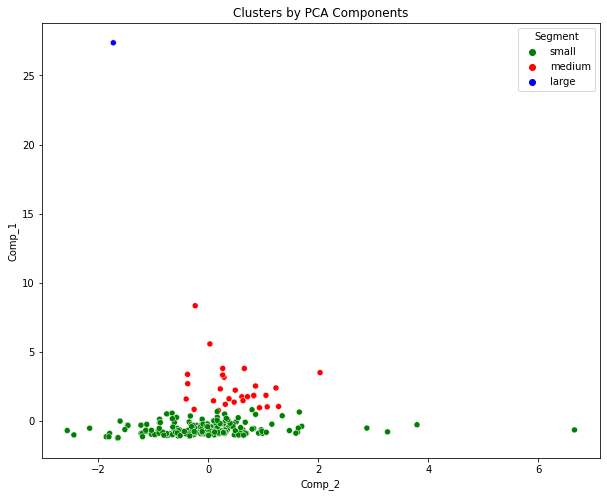

In [25]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.

x_axis = df_2['Comp_2']

y_axis = df_2['Comp_1']

plt.figure(figsize = (10, 8))

sns.scatterplot(x_axis, y_axis, hue = df_2['Segment'], palette = ['g', 'r', 'b'])
plt.title('Clusters by PCA Components')

plt.show()

In [26]:
# Creating a new column as has_ikea for the cities that has a ikea store
cities = ['Borlänge','Gävle','Göteborg','Gothenburg','Haparanda','Helsingborg',
          'Jönköping','Kalmar','Karlstad','Linköping','Malmö','Stockholm','Sundsvall',
          'Uddevalla','Umeå','Uppsala','Västerås','Älmhult','Örebro']

df_2['has_ikea'] = df_2.index
for j in range(0,207):
    if df_2.index[j] in cities:
        df_2['has_ikea'][j] = 1
    else:
        df_2['has_ikea'][j] = 0
        
df_2['has_ikea'] = df_2['has_ikea'].astype('bool')

df_2

C:\Users\abdul\AppData\Local\Temp/ipykernel_9412/1618833433.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['has_ikea'][j] = 1
C:\Users\abdul\AppData\Local\Temp/ipykernel_9412/1618833433.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['has_ikea'][j] = 0


,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Comp_1,Comp_2,Comp_3,Segment_K-means_PCA,Segment,has_ikea
Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,-0.256827,3.795376,-0.354488,0,small,True
Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,1.822138,0.826915,0.626856,1,medium,True
Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,2.545419,0.857841,0.874369,1,medium,True
Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0.286170,0.161894,0.314779,0,small,False
Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,-0.291902,-0.215088,0.834730,0,small,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,-1.068566,-0.337967,-0.938364,0,small,False
Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,-1.011093,0.640097,-0.813069,0,small,False
Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,3.817212,0.262281,0.233111,1,medium,True
Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,-0.737757,-0.437497,-0.333067,0,small,False


In [27]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Haparanda to Askersund
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Revenue                207 non-null    int64  
 1   Employee               207 non-null    int64  
 2   Population             207 non-null    int64  
 3   Population_University  207 non-null    int64  
 4   Percent_University     207 non-null    float64
 5   Productivity           207 non-null    float64
 6   SalesIndex             207 non-null    float64
 7   Comp_1                 207 non-null    float64
 8   Comp_2                 207 non-null    float64
 9   Comp_3                 207 non-null    float64
 10  Segment_K-means_PCA    207 non-null    int32  
 11  Segment                207 non-null    object 
 12  has_ikea               207 non-null    bool   
dtypes: bool(1), float64(6), int32(1), int64(4), object(1)
memory usage: 28.5+ KB


In [28]:
df_2['has_ikea'] == False

Haparanda         False
Kalmar            False
Karlstad          False
Upplands Väsby     True
Vallentuna         True
                  ...  
Hällefors          True
Ljusnarsberg       True
Örebro            False
Kumla              True
Askersund          True
Name: has_ikea, Length: 207, dtype: bool

In [29]:
#filtered by the kommuns that don't have the ikea stores, with small kommuns
df_3 = df_2[(df_2['Segment']  == 'small') & (df_2['has_ikea'] == False)]

In [30]:
#First City for the reccommendation
df_3.sort_values(by=['Population'], ascending=False).head(15)

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Comp_1,Comp_2,Comp_3,Segment_K-means_PCA,Segment,has_ikea
Botkyrka,1469,530,82608,8023,0.097121,138.90558,151.363926,0.660100,1.654467,-0.037309,0,small,False
Haninge,1459,1031,77054,6776,0.087938,70.92027,150.333539,0.527854,-0.757742,-0.417577,0,small,False
Varberg,1639,1109,58084,6151,0.105898,74.06639,168.880514,0.579155,-0.659533,0.019416,0,small,False
Gotland,1542,767,57269,6203,0.108313,100.75411,158.885755,0.515686,0.295410,0.170168,0,small,False
Norrtälje,1191,678,56080,4663,0.083149,88.03509,122.719153,0.146416,-0.113288,-0.403311,0,small,False
Trollhättan,2004,1038,55248,5812,0.105198,96.75516,206.489659,0.693616,0.160045,0.026456,0,small,False
Nyköping,1642,708,51644,5487,0.106247,116.22877,169.189631,0.494622,0.859435,0.157912,0,small,False
Hässleholm,1243,618,50107,4765,0.095096,100.79905,128.077169,0.207801,0.328090,-0.086927,0,small,False
Tyresö,480,290,42947,5219,0.121522,82.95012,49.458601,-0.054199,-0.348882,0.613887,0,small,False
Trelleborg,748,367,42219,3725,0.088230,102.14316,77.072986,-0.146509,0.395664,-0.164743,0,small,False


### From the cluster of small kommuns I would suggest Gotland as the first candidate for the ikea store, while taking the population into the account.  

In [31]:
#Second City for the reccommendation
df_3.sort_values(by=['SalesIndex'], ascending=False).head(15)

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Comp_1,Comp_2,Comp_3,Segment_K-means_PCA,Segment,has_ikea
Trollhättan,2004,1038,55248,5812,0.105198,96.75516,206.489659,0.693616,0.160045,0.026456,0,small,False
Burlöv,1962,928,16701,1639,0.098138,105.95581,202.162031,0.250564,0.542426,-0.038952,0,small,False
Nyköping,1642,708,51644,5487,0.106247,116.22877,169.189631,0.494622,0.859435,0.157912,0,small,False
Varberg,1639,1109,58084,6151,0.105898,74.06639,168.880514,0.579155,-0.659533,0.019416,0,small,False
Gotland,1542,767,57269,6203,0.108313,100.75411,158.885755,0.515686,0.295410,0.170168,0,small,False
Botkyrka,1469,530,82608,8023,0.097121,138.90558,151.363926,0.660100,1.654467,-0.037309,0,small,False
Haninge,1459,1031,77054,6776,0.087938,70.92027,150.333539,0.527854,-0.757742,-0.417577,0,small,False
Kävlinge,1455,559,29013,3911,0.134802,130.44425,149.921384,0.394072,1.343231,0.931237,0,small,False
Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0.286170,0.161894,0.314779,0,small,False
Strömstad,1281,667,11808,1071,0.090701,96.24918,131.992641,-0.161047,0.210898,-0.140187,0,small,False


### Nyköping would be my second candidate for the kommun for the ikea store as the are no nearby kommuns that has ikea store and also the Sales index is high compared to other kommuns.

In [32]:
#Third City for the reccommendation
df_3.sort_values(by=['Employee'], ascending=False).head(15)

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Comp_1,Comp_2,Comp_3,Segment_K-means_PCA,Segment,has_ikea
Varberg,1639,1109,58084,6151,0.105898,74.06639,168.880514,0.579155,-0.659533,0.019416,0,small,False
Trollhättan,2004,1038,55248,5812,0.105198,96.75516,206.489659,0.693616,0.160045,0.026456,0,small,False
Haninge,1459,1031,77054,6776,0.087938,70.92027,150.333539,0.527854,-0.757742,-0.417577,0,small,False
Burlöv,1962,928,16701,1639,0.098138,105.95581,202.162031,0.250564,0.542426,-0.038952,0,small,False
Gotland,1542,767,57269,6203,0.108313,100.75411,158.885755,0.515686,0.295410,0.170168,0,small,False
Alingsås,1065,719,37796,4554,0.120489,74.23257,109.736271,0.183608,-0.654974,0.489683,0,small,False
Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0.286170,0.161894,0.314779,0,small,False
Nyköping,1642,708,51644,5487,0.106247,116.22877,169.189631,0.494622,0.859435,0.157912,0,small,False
Norrtälje,1191,678,56080,4663,0.083149,88.03509,122.719153,0.146416,-0.113288,-0.403311,0,small,False
Strömstad,1281,667,11808,1071,0.090701,96.24918,131.992641,-0.161047,0.210898,-0.140187,0,small,False


### By sorting on Employee I would like to recommand Varberg for the Third Candidate. 